In [2]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,auc, fbeta_score
import matplotlib.pyplot as plt
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('titanicdf.csv')

In [4]:
# оставим только нужные колонки
df = df[['Survived','Pclass','Sex','Age','Fare']]

# заменим female на 0, male на 1
df.loc[df.Sex=='male','Sex'] = 1
df.loc[df.Sex=='female','Sex'] = 0

In [5]:
df.loc[df.Age.isna(),'Age'] = df.Age.median()

In [6]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500
...,...,...,...,...,...
886,0,2,1,27.0,13.0000
887,1,1,0,19.0,30.0000
888,0,3,0,28.0,23.4500
889,1,1,1,26.0,30.0000


In [7]:
X_train,X_test,y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                  df['Survived'], 
                                                  test_size=0.25, 
                                                  random_state=7)

In [8]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [9]:
pred = clf.predict(X_test)

In [10]:
print('Качество Accuracy=',sklearn.metrics.accuracy_score(y_test,pred))
print('Качество Precision=',sklearn.metrics.precision_score(y_test,pred))
print('Качество Recall=',sklearn.metrics.recall_score(y_test,pred))
print('F1=',sklearn.metrics.f1_score(y_test,pred))

Качество Accuracy= 0.7982062780269058
Качество Precision= 0.7721518987341772
Качество Recall= 0.6931818181818182
F1= 0.7305389221556886


In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
tree_para = {'criterion':['gini','entropy'],
             'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
             'min_samples_leaf':[1,2,3,4,5],
             'n_estimators':[10,11,12,15,20,30,40,50,60,70,80,100]}

In [13]:
# tree_para

In [14]:
clf_gs = GridSearchCV(RandomForestClassifier(), tree_para, cv=10, scoring = 'recall')
clf_gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 11, 12, 15, 20, 30, 40, 50, 60,
                                          70, 80, 100]},
             scoring='recall')

In [15]:
clf_gs.best_params_

{'criterion': 'gini',
 'max_depth': 50,
 'min_samples_leaf': 2,
 'n_estimators': 20}

## New best params

In [16]:
model_new = RandomForestClassifier(**clf_gs.best_params_)

In [17]:
model_new.fit(X_train,y_train)

RandomForestClassifier(max_depth=50, min_samples_leaf=2, n_estimators=20)

In [18]:
new_pred = model_new.predict(X_test)

In [19]:
print('new Accuracy:',sklearn.metrics.accuracy_score(y_test,new_pred))
print('new Precision:',sklearn.metrics.precision_score(y_test,new_pred))
print('new Recall:',sklearn.metrics.recall_score(y_test,new_pred))
print('new F1:',sklearn.metrics.f1_score(y_test,new_pred))

new Accuracy: 0.8071748878923767
new Precision: 0.8260869565217391
new Recall: 0.6477272727272727
new F1: 0.7261146496815287


## Кросс валидация

In [20]:
cv = ShuffleSplit(n_splits=10, test_size=0.33, random_state=0)
scores = cross_val_score(model_new, X_train, y_train, cv=cv, scoring='recall')

In [21]:
scores.mean()

0.7216108779920487

In [22]:
scores

array([0.76470588, 0.7125    , 0.72826087, 0.78947368, 0.66304348,
       0.71264368, 0.75      , 0.66666667, 0.70930233, 0.7195122 ])

## ROC кривая

In [23]:
fpr, tpr, treshold = roc_curve(y_test, new_pred)
tree_auc = roc_auc_score(y_test, new_pred)
print('DecisionTreeClassifier: ROC AUC=%.3f' % (tree_auc))

DecisionTreeClassifier: ROC AUC=0.779


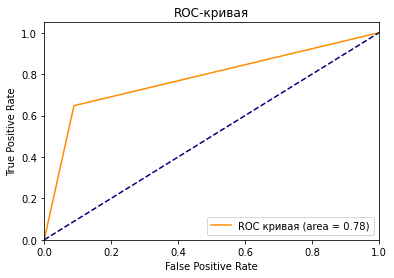

In [24]:
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr,  color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()